<a href="https://colab.research.google.com/github/SalinSharma666/Data-Science-Projects/blob/main/Predict_Student_Performance_in_secondary_education.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

High school performance depends upon several aspects ranging from their routine to their understanding level. From this dataset, we will be predicting their performances using relevant features.

Let's first import necessary libraries and the dataset itself.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import sys

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student-mat.csv')


In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.isna()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
df.shape

(395, 33)

Here, it is evident that we have got 395 rows and 33 columns in this data.

Now, let's see if we have any missing data in this dataset.

In [ ]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
df.isna().sum()/len(df) * 100

school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
Dalc          0.0
Walc          0.0
health        0.0
absences      0.0
G1            0.0
G2            0.0
G3            0.0
dtype: float64

Well, fortunately, this data set is complete with no missing data.

In [ ]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Now we will look into the central tendency and dispersion of this data

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
df.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

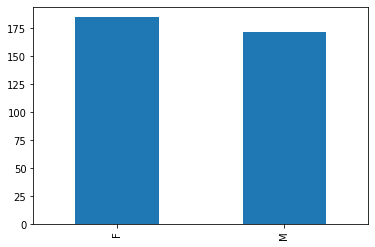

In [ ]:
df.sex.value_counts().plot.bar()

We can see that we have more female students than males.

In [ ]:
df.groupby('sex')['G3'].mean()

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

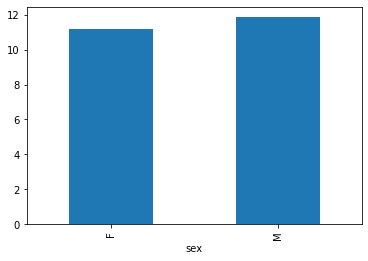

In [ ]:
df.groupby('sex')['G3'].mean().plot.bar()

Also, it is evident that male students are scoring more in average in the G3 exam than females.

In [ ]:
df.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

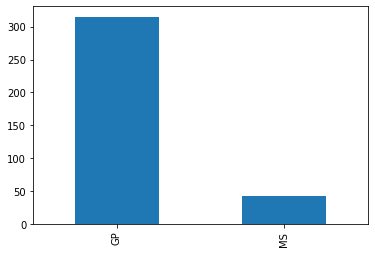

In [ ]:
df.school.value_counts().plot.bar()

We have more students from GP school than MS school in this data.

In [ ]:
df.groupby('sex')['Medu'].mean()

sex
F    2.668269
M    2.839572
Name: Medu, dtype: float64

In [ ]:
df.index

RangeIndex(start=0, stop=395, step=1)

In [ ]:
df.groupby('famrel')['G3'].mean()

famrel
1    10.625000
2     9.888889
3    10.044118
4    10.358974
5    10.830189
Name: G3, dtype: float64

Now, we will be dropping the records in G3 column whose score is zero, as it doesn't seem feasible to score 0 in an exam. It might be due to absenteeism or actually they scored zero in the test.

In [ ]:
df.drop(df[df.G3==0].index, inplace  = True)

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,16.655462,2.795518,2.546218,1.431373,2.042017,0.271709,3.955182,3.246499,3.098039,1.495798,2.330532,3.549020,6.316527,11.268908,11.358543,11.523810
std,1.268262,1.093999,1.084217,0.686075,0.831895,0.671750,0.885721,1.011601,1.090779,0.919886,1.294974,1.402638,8.187623,3.240450,3.147188,3.227797
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,5.000000,4.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,9.000000,9.000000,9.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Now, we will see if these features have any correlation with the scores in the g3 exam.

In [ ]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.139999,-0.138532,0.106723,0.000447,0.271748,0.066234,0.002889,0.128041,0.142015,0.120844,-0.049694,0.215578,-0.030706,-0.158273,-0.140372
Medu,-0.139999,1.000000,0.608327,-0.177805,0.055764,-0.214681,-0.006585,0.017753,0.078049,0.006122,-0.049314,-0.043790,0.075924,0.172444,0.203288,0.190308
Fedu,-0.138532,0.608327,1.000000,-0.185481,-0.028631,-0.262197,-0.009537,-0.023222,0.042474,-0.018816,-0.018914,0.009127,0.008948,0.162752,0.178706,0.158811
traveltime,0.106723,-0.177805,-0.185481,1.000000,-0.095827,0.128950,-0.023566,-0.007936,0.037167,0.154209,0.139424,0.001316,0.004628,-0.086438,-0.109559,-0.099785
studytime,0.000447,0.055764,-0.028631,-0.095827,1.000000,-0.131072,0.052122,-0.152533,-0.047891,-0.199821,-0.247601,-0.072786,-0.074541,0.140638,0.119759,0.126728
failures,0.271748,-0.214681,-0.262197,0.128950,-0.131072,1.000000,-0.007802,0.103712,0.128388,0.167774,0.174172,0.046940,0.148261,-0.302071,-0.301316,-0.293831
famrel,0.066234,-0.006585,-0.009537,-0.023566,0.052122,-0.007802,1.000000,0.134631,0.030728,-0.079527,-0.126642,0.108042,-0.058076,0.010083,-0.005304,0.037711
freetime,0.002889,0.017753,-0.023222,-0.007936,-0.152533,0.103712,0.134631,1.000000,0.283519,0.209400,0.132759,0.086485,-0.070492,0.005429,-0.015486,-0.021589
goout,0.128041,0.078049,0.042474,0.037167,-0.047891,0.128388,0.030728,0.283519,1.000000,0.281761,0.444320,-0.009576,0.056590,-0.150527,-0.155100,-0.177383
Dalc,0.142015,0.006122,-0.018816,0.154209,-0.199821,0.167774,-0.079527,0.209400,0.281761,1.000000,0.644920,0.088875,0.104791,-0.128721,-0.127554,-0.140690


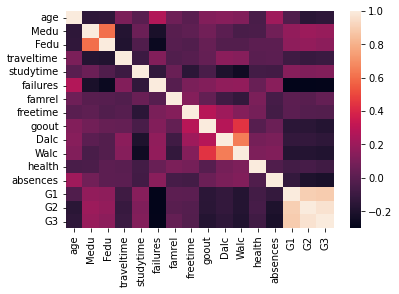

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


We will now model the data for predictions. Since many features contain data in string, we will encode all those features by using one hot encoding method.

In [ ]:
df_clean = pd.get_dummies(data = df, columns = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup',
'paid',
'activities',
'nursery','higher','internet','romantic'
], drop_first = True)

Modelling

In [ ]:
X = df_clean.iloc[:,:32]
y = df_clean['G3']

In [ ]:
X

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation
0,18,4,4,2,2,0,4,3,4,1,...,0,0,0,0,0,0,1,0,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,0,1,0,0,0,0,0
2,15,1,1,1,2,3,4,3,2,2,...,0,0,0,0,1,0,0,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,0,0,0,0,1,0,1,0,0
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0,1,0,0,0,1,0,0,0,0
391,17,3,1,2,1,0,2,4,5,3,...,0,1,0,0,0,1,0,0,0,0
392,21,1,1,1,1,3,5,5,3,3,...,1,0,0,0,1,0,0,0,0,0
393,18,3,2,3,1,0,4,4,1,3,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 357, dtype: int64

Since our target is a continuous data, we will be using Linear regression to create the prediction models.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=30)

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mean_squared_error(y_test, y_pred)

5.160465088320786e-30

In [ ]:
mean_absolute_error(y_test, y_pred)

1.4926331775515994e-15

Now let's cross validate this model in order to decrease the MSE and MAE so that the model would be more accurate.

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
model = LinearRegression()

In [ ]:
scores = cross_validate(estimator = model, X=X, y=y, scoring = 'neg_mean_squared_error', cv = 5)

In [ ]:
mean_squared_error(y_test, y_pred)

5.160465088320786e-30

In [ ]:
np.mean(- scores['test_score'])

1.1640605585340526e-29

**In conclusion**

This linear regression model can be used to predict the performances of the high school students.